## Importing necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import preprocessor as p
import contractions
import string
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score, f1_score

## Functions

In [2]:
def preprocess_tweet(row):
    text=row['tweet']
    text=p.clean(text)
    return text

def lowercase(text):
    text = text.lower()
    return text

# Expand the contractions here
def expand_contractions(text):
    text = contractions.fix(text)
    return text

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

def remove_digits(text):
    text=re.sub('[0-9]+', '',text)
    return text

def tokenizing(text):
    text = word_tokenize(text)
    tokens = [w for w in text if w not in stop_words]
    return tokens

# Function for evaluating
def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(xtest)
    # Print the evaluation metrics for the dataset.
    print("Accuracy is {}".format(accuracy_score(ytest, y_pred)))
    print("F1 Score is {}".format(f1_score(ytest, y_pred)))
    print(classification_report(ytest, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(ytest, y_pred)
    print(cf_matrix)

## Reading data

In [3]:
df = pd.read_csv("TweetsSentiment140.csv",header=None, encoding= "latin-1")
df.head(5)

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
df.shape

(1600000, 6)

In [5]:
df_1=df[:10000]
df_1.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [6]:
df_2=df[1590000:]
df_2.head()

,0,1,2,3,4,5
1590000,4,2191325432,Tue Jun 16 05:02:08 PDT 2009,NO_QUERY,Galiiit,@michaelahills YEP
1590001,4,2191325450,Tue Jun 16 05:02:08 PDT 2009,NO_QUERY,ulovefran,need to do homework.. can't wait for LVATT.. i...
1590002,4,2191325560,Tue Jun 16 05:02:09 PDT 2009,NO_QUERY,KatSyriou,"@AnneSudworth Gosh, that's hectic... Tea? I'm ..."
1590003,4,2191325718,Tue Jun 16 05:02:10 PDT 2009,NO_QUERY,aymarn,@hana77 Daily: 8am - 12 midnight
1590004,4,2191325744,Tue Jun 16 05:02:11 PDT 2009,NO_QUERY,stevemaythe1st,watching the staff in the posh Soho face cream...


In [7]:
df_2.reset_index(drop=True,inplace=True)
df_2.head()

,0,1,2,3,4,5
0,4,2191325432,Tue Jun 16 05:02:08 PDT 2009,NO_QUERY,Galiiit,@michaelahills YEP
1,4,2191325450,Tue Jun 16 05:02:08 PDT 2009,NO_QUERY,ulovefran,need to do homework.. can't wait for LVATT.. i...
2,4,2191325560,Tue Jun 16 05:02:09 PDT 2009,NO_QUERY,KatSyriou,"@AnneSudworth Gosh, that's hectic... Tea? I'm ..."
3,4,2191325718,Tue Jun 16 05:02:10 PDT 2009,NO_QUERY,aymarn,@hana77 Daily: 8am - 12 midnight
4,4,2191325744,Tue Jun 16 05:02:11 PDT 2009,NO_QUERY,stevemaythe1st,watching the staff in the posh Soho face cream...


In [8]:
df_1.shape

(10000, 6)

In [9]:
data = vertical_stack = pd.concat([df_1, df_2], axis=0)

In [10]:
data.shape

(20000, 6)

In [11]:
data.reset_index(drop=True,inplace=True)
data.tail()

,0,1,2,3,4,5
19995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
19996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
19997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
19998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
19999,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


In [12]:
data.columns = ['sentiment', 'id', 'date', 'query', 'username', 'tweet']
data.head()

,sentiment,id,date,query,username,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


## Data Preprocessing

In [13]:
# Now we just want to identify the sentiment based upon tweet so, we'll drop rest of the columns
data.drop(columns=["id","date","query","username"],inplace=True)
data

,sentiment,tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
19995,4,Just woke up. Having no school is the best fee...
19996,4,TheWDB.com - Very cool to hear old Walt interv...
19997,4,Are you ready for your MoJo Makeover? Ask me f...
19998,4,Happy 38th Birthday to my boo of alll time!!! ...


In [14]:
# Checking for any null values
data.isnull().sum()

sentiment    0
tweet        0
dtype: int64

In [15]:
# Checking for the values assigned to sentiment column
data["sentiment"].value_counts()

4    10000
0    10000
Name: sentiment, dtype: int64

In [16]:
# 0 means a negative tweet and 4 means positive. We can replace it with 0 and 1
data["sentiment"].replace(to_replace=4,value=1,inplace=True)

In [17]:
data["sentiment"].value_counts()

1    10000
0    10000
Name: sentiment, dtype: int64

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


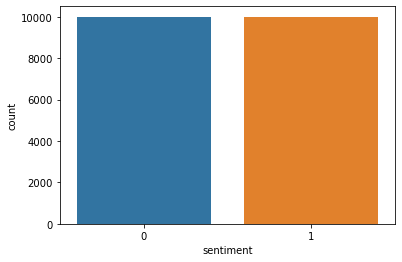

In [18]:
sns.countplot(data["sentiment"]) # the classes are equally distributed

In [19]:
data.dtypes

sentiment     int64
tweet        object
dtype: object

## Text Preprocessing

In [20]:
# Now, the next step is text preprocessing. 
# expanding the column width
pd.set_option('display.max_colwidth',-1)
data.head()

,sentiment,tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
1,0,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
2,0,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."


In [21]:
# We can see that we have some punctuations,stopwords,urls, hashtags, mentions
data.tail()

,sentiment,tweet
19995,1,Just woke up. Having no school is the best feeling ever
19996,1,TheWDB.com - Very cool to hear old Walt interviews! â« http://blip.fm/~8bmta
19997,1,Are you ready for your MoJo Makeover? Ask me for details
19998,1,Happy 38th Birthday to my boo of alll time!!! Tupac Amaru Shakur
19999,1,happy #charitytuesday @theNSPCC @SparksCharity @SpeakingUpH4H


In [22]:
#! pip install tweet-preprocessor

In [23]:
data['clean_tweet'] = data.apply(preprocess_tweet, axis=1)
data[:10]

,sentiment,tweet,clean_tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D","- Awww, that's a bummer. You shoulda got David Carr of Third Day to do it."
1,0,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
2,0,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds,I dived many times for the ball. Managed to save % The rest go out of bounds
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there.","no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."
5,0,@Kwesidei not the whole crew,not the whole crew
6,0,Need a hug,Need a hug
7,0,"@LOLTrish hey long time no see! Yes.. Rains a bit ,only a bit LOL , I'm fine thanks , how's you ?","hey long time no see! Yes.. Rains a bit ,only a bit LOL , I'm fine thanks , how's you ?"
8,0,@Tatiana_K nope they didn't have it,nope they didn't have it
9,0,@twittera que me muera ?,que me muera ?


In [24]:
str="- Awww, that's a bummer. You shoulda got David Carr of Third Day to do it."
test1 = str.lower()
test1

"- awww, that's a bummer. you shoulda got david carr of third day to do it."

In [25]:
data["clean_tweet"]=data["clean_tweet"].apply(lowercase)
data["clean_tweet"]

0        - awww, that's a bummer. you shoulda got david carr of third day to do it.                                    
1        is upset that he can't update his facebook by texting it... and might cry as a result school today also. blah!
2        i dived many times for the ball. managed to save % the rest go out of bounds                                  
3        my whole body feels itchy and like its on fire                                                                
4        no, it's not behaving at all. i'm mad. why am i here? because i can't see you all over there.                 
                                                     ...                                                               
19995    just woke up. having no school is the best feeling ever                                                       
19996    thewdb.com - very cool to hear old walt interviews!                                                           
19997    are you ready for your mojo mak

In [26]:
#!pip install contractions

In [27]:
 # Checking how contractions work
example = "that's a bummer.  he can't update. i'm okay. He'd do that. Trump's car"
example = contractions.fix(example)
example

"that is a bummer.  he cannot update. i am okay. He would do that. Trump's car"

In [28]:
data["clean_tweet"]=data["clean_tweet"].apply(expand_contractions)
data["clean_tweet"]

0        - awww, that is a bummer. you shoulda got david carr of third day to do it.                                    
1        is upset that he cannot update his facebook by texting it... and might cry as a result school today also. blah!
2        i dived many times for the ball. managed to save % the rest go out of bounds                                   
3        my whole body feels itchy and like its on fire                                                                 
4        no, it is not behaving at all. i am mad. why am i here? because i cannot see you all over there.               
                                                       ...                                                              
19995    just woke up. having no school is the best feeling ever                                                        
19996    thewdb.com - very cool to hear old walt interviews!                                                            
19997    are you ready for your 

In [29]:
# We will remove punctuations using string package

# Apply to the DF series
data['clean_tweet'] = data['clean_tweet'].apply(remove_punctuations)
data['clean_tweet']    

0         awww that is a bummer you shoulda got david carr of third day to do it                                   
1        is upset that he cannot update his facebook by texting it and might cry as a result school today also blah
2        i dived many times for the ball managed to save  the rest go out of bounds                                
3        my whole body feels itchy and like its on fire                                                            
4        no it is not behaving at all i am mad why am i here because i cannot see you all over there               
                                                    ...                                                            
19995    just woke up having no school is the best feeling ever                                                    
19996    thewdbcom  very cool to hear old walt interviews                                                          
19997    are you ready for your mojo makeover ask me for details        

In [30]:
data['clean_tweet'] = data['clean_tweet'].apply(remove_digits)
data['clean_tweet']    

0         awww that is a bummer you shoulda got david carr of third day to do it                                   
1        is upset that he cannot update his facebook by texting it and might cry as a result school today also blah
2        i dived many times for the ball managed to save  the rest go out of bounds                                
3        my whole body feels itchy and like its on fire                                                            
4        no it is not behaving at all i am mad why am i here because i cannot see you all over there               
                                                    ...                                                            
19995    just woke up having no school is the best feeling ever                                                    
19996    thewdbcom  very cool to hear old walt interviews                                                          
19997    are you ready for your mojo makeover ask me for details        

In [31]:
# Checking if numbers are removed
data.iloc[39]

sentiment      0                                                                                                                
tweet          Bed. Class 8-12. Work 12-3. Gym 3-5 or 6. Then class 6-10. Another day that's gonna fly by. I miss my girlfriend 
clean_tweet    bed class  work  gym  or  then class  another day that is going to fly by i miss my girlfriend                   
Name: 39, dtype: object

In [32]:
#nltk.download('punkt')

In [33]:
# testing how tokenizer works
example = "awww that is a bummer you shoulda got david carr of third day to do it "
example2 = word_tokenize(example)
example2

['awww',
 'that',
 'is',
 'a',
 'bummer',
 'you',
 'shoulda',
 'got',
 'david',
 'carr',
 'of',
 'third',
 'day',
 'to',
 'do',
 'it']

In [34]:
stop_words = set(stopwords.words('english'))
tokens = [w for w in example2 if not w in stop_words]

In [35]:
tokens

['awww', 'bummer', 'shoulda', 'got', 'david', 'carr', 'third', 'day']

In [36]:
data["clean_tweet"]=data["clean_tweet"].apply(tokenizing)
data["clean_tweet"]

0        [awww, bummer, shoulda, got, david, carr, third, day]                            
1        [upset, update, facebook, texting, might, cry, result, school, today, also, blah]
2        [dived, many, times, ball, managed, save, rest, go, bounds]                      
3        [whole, body, feels, itchy, like, fire]                                          
4        [behaving, mad, see]                                                             
                 ...                                                                      
19995    [woke, school, best, feeling, ever]                                              
19996    [thewdbcom, cool, hear, old, walt, interviews]                                   
19997    [ready, mojo, makeover, ask, details]                                            
19998    [happy, th, birthday, boo, alll, time, tupac, amaru, shakur]                     
19999    [happy]                                                                          

## Convert each tweet as a sequence of words (string) and not list for count vectorizer
For Example: [awww, bummer, shoulda, got, david, carr, third, day] should be converted to "aww bummer shoulda got david carr third day". Then use other techniques too.

In [37]:
all_tokens=[]
for i in data["clean_tweet"]:
    for j in i:
        all_tokens.append(j)
all_tokens[:50]   

['awww',
 'bummer',
 'shoulda',
 'got',
 'david',
 'carr',
 'third',
 'day',
 'upset',
 'update',
 'facebook',
 'texting',
 'might',
 'cry',
 'result',
 'school',
 'today',
 'also',
 'blah',
 'dived',
 'many',
 'times',
 'ball',
 'managed',
 'save',
 'rest',
 'go',
 'bounds',
 'whole',
 'body',
 'feels',
 'itchy',
 'like',
 'fire',
 'behaving',
 'mad',
 'see',
 'whole',
 'crew',
 'need',
 'hug',
 'hey',
 'long',
 'time',
 'see',
 'yes',
 'rains',
 'bit',
 'bit',
 'lol']

In [38]:
vocabulary = set(all_tokens)
print(len(vocabulary))
frequency_dist = nltk.FreqDist(all_tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:10]

21869


['good', 'day', 'get', 'work', 'going', 'today', 'go', 'like', 'got', 'love']

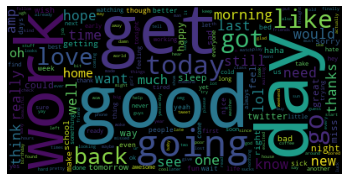

In [39]:
wordcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [40]:
# Dividing data into features and target variable
X= data["clean_tweet"]
y= data["sentiment"]

In [41]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3, random_state=43)

## Text Vectorization

In [42]:
xtrain

18822    [looking, forward, lunch, broncos, sweetheart]                                                        
17415    [waiting, omnia, ii]                                                                                  
12240    [going, pick, cousins, school, today, beyond, excited]                                                
5588     [bus, school, boo, making, biology, test, today]                                                      
12022    [yea, knows, may, next, get, bailout, know, ask, live, make]                                          
                                     ...                                                                       
18448    [glad, got, hang, learned, danger, tweeting, peoples, names, without, space, context, startin, rumors]
7985     [ok, official, feel, like, crap, know, allergies, cold, hate, feeling, phlem, back, throat]           
18687    [interesting, mean, us, dirty, something, hehehehe]                                            

In [43]:
#xtrain=xtrain.apply(lambda x: ' '.join(x))
#xtrain

In [44]:
vectoriser = CountVectorizer()
vectoriser.fit(xtrain.apply(lambda x: ' '.join(x))) #The TFIDF Vectorizer should expect an array of strings. So if you pass him an array of arrays of tokenz, it crashes. 
#The lambda function that we have added will change list of words into a string of words. [hard, study, thing, timei, want, sleep] -> hard study thing timei want sleep
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  17430


In [45]:
#xtest=xtest.apply(lambda x: ' '.join(x))
#xtest

In [46]:
xtrain = vectoriser.transform(xtrain.apply(lambda x: ' '.join(x))).toarray()
xtest  = vectoriser.transform(xtest.apply(lambda x: ' '.join(x))).toarray()

## Model training and Results

In [47]:
xtrain

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [48]:
SVCmodel = LinearSVC()
SVCmodel.fit(xtrain, ytrain)
model_Evaluate(SVCmodel)

Accuracy is 0.7108333333333333
F1 Score is 0.7181153533712428
              precision    recall  f1-score   support

           0       0.72      0.69      0.70      2984
           1       0.70      0.73      0.72      3016

    accuracy                           0.71      6000
   macro avg       0.71      0.71      0.71      6000
weighted avg       0.71      0.71      0.71      6000

[[2055  929]
 [ 806 2210]]


In [49]:
LogRegModel = LogisticRegression(max_iter=1000)
LogRegModel.fit(xtrain, ytrain)
model_Evaluate(LogRegModel)

Accuracy is 0.722
F1 Score is 0.7290448343079922
              precision    recall  f1-score   support

           0       0.73      0.70      0.71      2984
           1       0.71      0.74      0.73      3016

    accuracy                           0.72      6000
   macro avg       0.72      0.72      0.72      6000
weighted avg       0.72      0.72      0.72      6000

[[2088  896]
 [ 772 2244]]
